In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/time-series-for-online-store/sample_submission.csv
/kaggle/input/time-series-for-online-store/sales.csv


# **1. Get to know the dataset**
First things first, we want to check the dataset and make necessary adjustments as needed
- What does the data looks like? How many columns & rows?
- Is there any null? How about duplication?
- What are the datatypes?

In [2]:
df_sales = pd.read_csv("/kaggle/input/time-series-for-online-store/sales.csv")
df_sales.tail()

,date,id,category_id,sales,views,price_cost,price_retail
2548819,2024-02-21,3482,2,0,41,2440,3170
2548820,2024-02-22,3482,2,0,23,2440,3172
2548821,2024-02-23,3482,2,0,14,2440,3172
2548822,2024-02-24,3482,2,0,17,2440,3172
2548823,2024-02-25,3482,2,0,25,2440,3172


In [3]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548824 entries, 0 to 2548823
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   id            int64 
 2   category_id   int64 
 3   sales         int64 
 4   views         int64 
 5   price_cost    int64 
 6   price_retail  int64 
dtypes: int64(6), object(1)
memory usage: 136.1+ MB


In [4]:
#cast date dtype from object to date
df_sales = df_sales.astype({'date':'datetime64[ns]'})
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548824 entries, 0 to 2548823
Data columns (total 7 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   id            int64         
 2   category_id   int64         
 3   sales         int64         
 4   views         int64         
 5   price_cost    int64         
 6   price_retail  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 136.1 MB


In [5]:
df_sales.isnull().sum()
#no null value

date            0
id              0
category_id     0
sales           0
views           0
price_cost      0
price_retail    0
dtype: int64

In [6]:
df_sales.shape

(2548824, 7)

In [7]:
#delete duplicates (if any)
df_sales1 = df_sales.drop_duplicates()
df_sales1.shape
#same row number as before, no duplication

(2548824, 7)

In [8]:
df_sales[['date','sales','views']].describe().round(2)

,date,sales,views
count,2548824,2548824.00,2548824.00
mean,2023-02-24 12:00:00.000000512,0.37,38.25
min,2022-02-24 00:00:00,0.00,0.00
25%,2022-08-25 18:00:00,0.00,0.00
50%,2023-02-24 12:00:00,0.00,8.00
75%,2023-08-26 06:00:00,0.00,33.00
max,2024-02-25 00:00:00,1372.00,43148.00
std,NaN,5.04,182.43


# **2. Explore the dataset**
In this part, we want to manipulate the data to provide answers

In [9]:
df_sales['year'] = df_sales['date'].dt.year
df_sales

,date,id,category_id,sales,views,price_cost,price_retail,year
0,2022-02-24,1,3,0,0,0,0,2022
1,2022-02-25,1,3,0,0,0,0,2022
2,2022-02-26,1,3,0,0,0,0,2022
3,2022-02-27,1,3,0,0,0,0,2022
4,2022-02-28,1,3,0,0,0,0,2022
...,...,...,...,...,...,...,...,...
2548819,2024-02-21,3482,2,0,41,2440,3170,2024
2548820,2024-02-22,3482,2,0,23,2440,3172,2024
2548821,2024-02-23,3482,2,0,14,2440,3172,2024
2548822,2024-02-24,3482,2,0,17,2440,3172,2024


In [10]:
#check the category_id sales & views
#using groupby

#1. which category_id have the highest number of sales in 2023?
#answer: category_id 2

filter23 = df_sales['date'].dt.year == 2023
df_sales_cat = df_sales[(filter23)]

df_sales_cat = df_sales_cat[['category_id', 'sales', 'views']].groupby('category_id', 
                                                         as_index=False).sum()
df_sales_cat = df_sales_cat.sort_values(by='sales', ascending=False)

df_sales_cat

,category_id,sales,views
1,2,340293,13916025
0,1,74504,29953660
2,3,51645,5477587
3,4,370,226473


In [11]:
#check the category_id sales & views
#using pivot_table

#1. which category_id have the all time highest number of sales?
#answer: category_id 2

table_cat = pd.pivot_table(df_sales, values=['sales', 'views'],
                          index='category_id',
                          aggfunc="sum")
table_cat.sort_values(by='sales',
                     ascending=False)


,sales,views
category_id,,
2,743416,34839778
1,127308,53906343
3,73233,8343857
4,656,405849


In [12]:
#2. show the yearly number of sales & views performance
df_sales_year = df_sales[['sales','views']].groupby(df_sales['date'].dt.year).sum()
df_sales_year


,sales,views
date,,
2022,391568,39849688
2023,466812,49573745
2024,86233,8072394


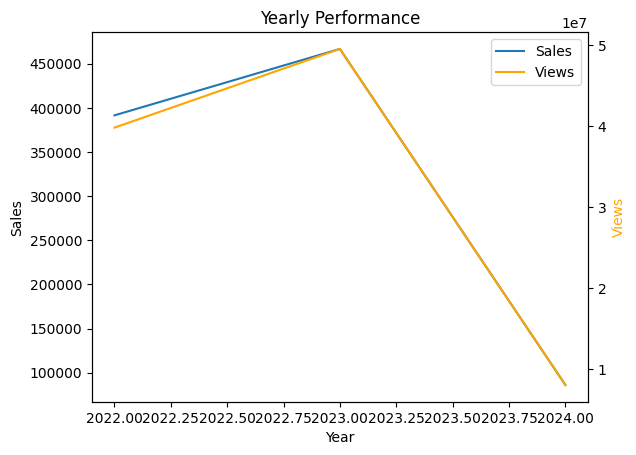

In [13]:
#3. visualize the yearly performance into line chart

year = pd.Series.unique(df_sales['date'].dt.year)

fig, ax = plt.subplots()
line1 = ax.plot(year, df_sales_year['sales'], label='Sales')
ax.set_ylabel('Sales')

#secondary y-axis
ax2 = ax.twinx()
line2 = ax2.plot(year, df_sales_year['views'], label='Views', color='orange')
ax2.set_ylabel('Views', color='orange')

#create legend for both lines
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels)

ax.set_xlabel("Year")
ax.set_title("Yearly Performance")
plt.show()

In [14]:
#4. find which category_id has the highest sales/views ratio
#answer: category_id 2 have the highest sales/views ratio

table_cat['sales_per_view']=table_cat['sales']/table_cat['views']
table_cat = table_cat.sort_values(by='sales_per_view', ascending=False)
table_cat

,sales,views,sales_per_view
category_id,,,
2,743416,34839778,0.021338
3,73233,8343857,0.008777
1,127308,53906343,0.002362
4,656,405849,0.001616


In [15]:
#5. calculate the profit based on category_id. which category is the most profitable?
#answer: Category 1 is the most profitable

#add new column for profit
df_sales['profit'] = df_sales['sales'] * (df_sales['price_retail'] - df_sales['price_cost'])

df_cat_profit = df_sales[['sales','views','profit']].groupby(df_sales['category_id']).sum()
df_cat_profit.sort_values(by='profit',
                         ascending=False)
df_cat_profit

,sales,views,profit
category_id,,,
1,127308,53906343,951633325
2,743416,34839778,203767612
3,73233,8343857,24592293
4,656,405849,15019733


In [35]:
#6. Calculate the profit based on year
#answer: year 2023 is the most profitable year with 40% growth compare to 2022

df_year_profit = df_sales[['profit']].groupby(df_sales['year'],
                                             as_index=True).sum()
df_year_profit['growth'] = df_year_profit.apply(pd.Series.pct_change)
df_year_profit['growth'] = (df_year_profit['growth'].dropna()*100).round(2)
df_year_profit.reset_index()
df_year_profit

,profit,growth
year,,
2022,453356472,NaN
2023,636795844,40.46
2024,104860647,-83.53


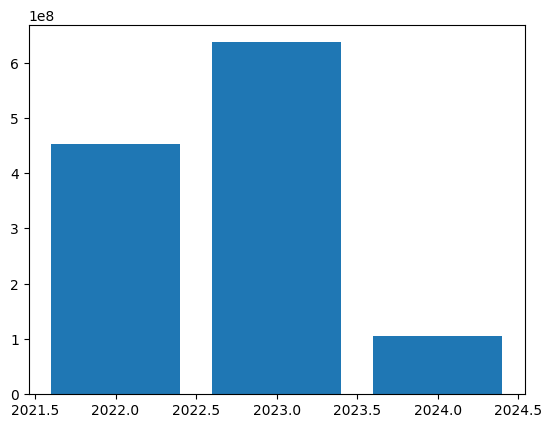

In [45]:
#7. plot the yearly profit in a bar chart

x = df_year_profit.index
y = df_year_profit['profit']

plt.bar(x,y)
plt.show()

In [64]:
#8. list all product_ids sold in discount
#answer: there are 349 unique ids sold with negative margin/discount
df_discount = df_sales[(df_sales['profit'] < 0)]

unique_id = pd.unique(df_discount['id'])
unique_id

#len(unique_id) -- to get the total number of the unique ids

array([  55,   59,   67,   77,   99,  102,  121,  125,  143,  149,  158,
        159,  164,  171,  193,  212,  233,  240,  247,  249,  251,  253,
        264,  266,  280,  301,  302,  309,  329,  341,  373,  376,  401,
        423,  457,  472,  480,  486,  504,  525,  541,  549,  605,  609,
        616,  620,  628,  635,  662,  677,  682,  684,  695,  706,  714,
        729,  730,  734,  767,  769,  770,  778,  784,  799,  807,  808,
        813,  816,  819,  824,  836,  849,  856,  875,  879,  899,  902,
        903,  920,  925,  930,  932,  951,  964,  965,  967,  971,  976,
        986,  997, 1015, 1016, 1022, 1041, 1048, 1050, 1099, 1101, 1111,
       1115, 1119, 1141, 1149, 1151, 1163, 1175, 1188, 1196, 1200, 1202,
       1205, 1206, 1210, 1214, 1225, 1226, 1240, 1251, 1254, 1271, 1278,
       1308, 1323, 1326, 1343, 1356, 1362, 1364, 1369, 1380, 1398, 1399,
       1413, 1420, 1434, 1435, 1439, 1468, 1479, 1480, 1485, 1506, 1540,
       1546, 1550, 1551, 1569, 1581, 1588, 1601, 16